In [1]:
import pandas as pd

In [2]:
df = pd.read_feather('../data/data.feather')

In [70]:
missing = df.isna().sum() / df.shape[0]
subset = df[missing[missing < 0.1].index]
subset = subset.sample(n=100, random_state=42)
df.isna().mean()

q2             0.636703
q11            0.577891
q12            0.670972
q13            0.523468
q14            0.544734
                 ...   
race           0.189364
gender2        0.032236
gender2_num    0.032236
CA_items       0.000000
missing        1.000000
Length: 2626, dtype: float64

In [4]:
subset

,q34113,q64664,q85419,q416235,d_gender,d_religion_type,lf_want,d_astrology_sign,d_country,d_age,...,d_relationship,lf_location,lf_min_age,lf_single,q20062,gender_orientation,gender,gender2,gender2_num,CA_items
34242,"It's okay, if it is not abused",I don't really care.,Rosé (such as White Zinfindel).,Yes,Man,-,Women,Scorpio,WI,28.0,...,Single,Near me,19.0,Who are single,Absolutely.,Hetero_male,Man,Man,1.0,5.0
6924,Never - Get a job,I don't really care.,Rosé (such as White Zinfindel).,Can't answer without a subtitle,Woman,Atheism,Women,Aries,Netherlands,21.0,...,Single,Near me,18.0,Who are single,The best? Maybe...,Bisexual_female,Woman,Woman,0.0,4.0
44684,Never - Get a job,I don't really care.,Rosé (such as White Zinfindel).,Can't answer without a subtitle,Woman,-,Men,Scorpio,IL,28.0,...,Single,Near me,18.0,Who are single,The best? Maybe...,Hetero_female,Woman,Woman,0.0,2.0
30424,Never - Get a job,I don't really care.,Rosé (such as White Zinfindel).,Can't answer without a subtitle,Man,Christianity,Women,Libra,CA,41.0,...,Single,Near me,30.0,Who are single,The best? Maybe...,Hetero_male,Man,Man,1.0,1.0
62544,No problem,I don't really care.,I don't drink wine.,Yes,Man,Agnosticism,Women,Libra,CA,34.0,...,Single,Near me,24.0,Who are single,The best? Maybe...,Hetero_male,Man,Man,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61441,"It's okay, if it is not abused",I don't really care.,I don't drink wine.,Yes,Man,Agnosticism,Women,-,WA,35.0,...,Single,Near me,27.0,Who are single,The best? Maybe...,Hetero_male,Man,Man,1.0,8.0
45832,No problem,I don't really care.,"Red (such as Merlot, Cabernet, Shiraz).",Can't answer without a subtitle,Woman,-,Men,Taurus,OK,42.0,...,Single,Near me,28.0,Who are single,The best? Maybe...,Hetero_female,Woman,Woman,0.0,7.0
20636,Never - Get a job,I don't really care.,Rosé (such as White Zinfindel).,Can't answer without a subtitle,Woman,Agnosticism,Everybody,Aries,MD,28.0,...,Single,Located anywhere,18.0,Who are single,The best? Maybe...,Bisexual_female,Woman,Woman,0.0,1.0
67372,No problem,I don't really care.,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Man,Atheism,Everyone,Capricorn,TX,30.0,...,Single,Near me,18.0,Who are single,Absolutely.,Hetero_male,Man,Man,1.0,7.0


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# One-hot encode categorical variables
df_encoded = pd.get_dummies(subset, columns=subset.select_dtypes(exclude=[np.number]).columns)

# Create and fit the imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), random_state=42)
imputed_array = imputer.fit_transform(df_encoded)

# Create DataFrame with imputed values
imputed_df = pd.DataFrame(imputed_array, columns=df_encoded.columns, index=df_encoded.index)

# # Round the imputed values for binary columns (from one-hot encoding)
# for col in imputed_df.columns:
#     if set(subset[col].dropna().unique()) == {0, 1}:
#         imputed_df[col] = imputed_df[col].round()

print(imputed_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 34242 to 20075
Columns: 149 entries, d_age to gender2_Woman
dtypes: float64(149)
memory usage: 117.2 KB
None


/Users/isaiahkriegman/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [7]:
imputed_df

,d_age,lf_max_age,lf_min_age,gender2_num,CA_items,q34113_No problem,"q34113_It's okay, if it is not abused",q34113_Okay for short amounts of time,q34113_Never - Get a job,q64664_No.,...,gender_orientation_Hetero_female,gender_orientation_Bisexual_female,gender_orientation_Gay_female,gender_orientation_Gay_male,gender_orientation_Bisexual_male,gender_orientation_Hetero_male,gender_Man,gender_Woman,gender2_Man,gender2_Woman
34242,28.0,34.0,19.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6924,21.0,28.0,18.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
44684,28.0,50.0,18.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
30424,41.0,42.0,30.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
62544,34.0,39.0,24.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61441,35.0,40.0,27.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
45832,42.0,50.0,28.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20636,28.0,100.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
67372,30.0,35.0,18.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    0.0
97    0.0
98    1.0
99    1.0
Name: gender2_Man, Length: 100, dtype: float64


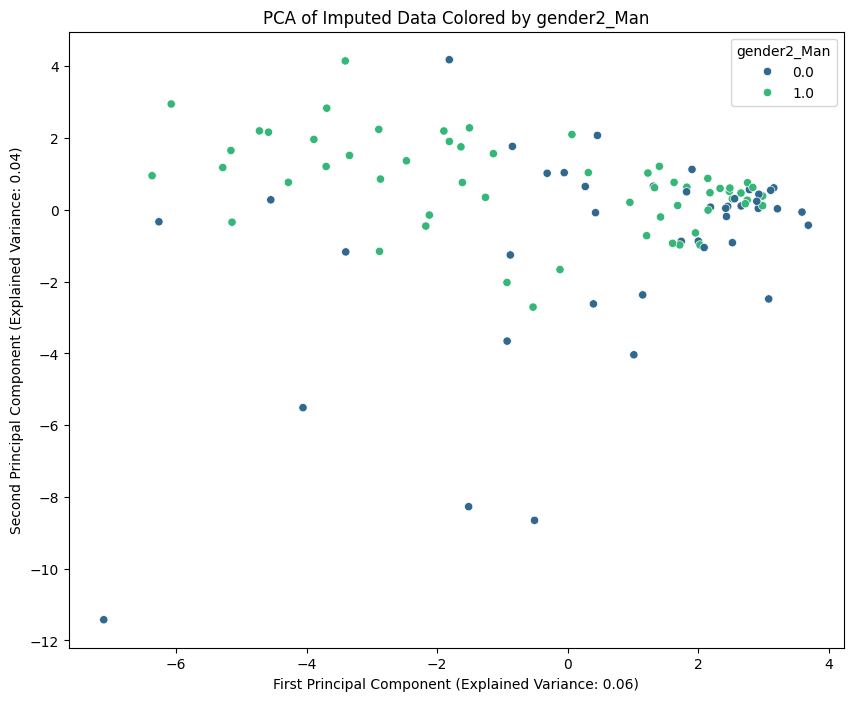

Explained Variance Ratio:
PC1: 0.0575
PC2: 0.0373
Total: 0.0948


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
y = imputed_df['gender2_Man']
gender_cols = [col for col in imputed_df.columns if 'gender' in col]
X = imputed_df.drop(gender_cols, axis=1)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['gender2_Man'] = y.reset_index(drop=True)
print(pca_df['gender2_Man'])

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='gender2_Man', palette='viridis')
plt.title('PCA of Imputed Data Colored by gender2_Man')
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.legend(title='gender2_Man')
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca.explained_variance_ratio_[:2]):.4f}")

In [21]:
pca_df

,PC1,PC2,gender2_Man
0,2.509213,-0.028061,1.0
1,-3.349577,4.222332,0.0
2,-3.565301,-0.680463,0.0
3,2.509213,-0.028061,1.0
4,2.509213,-0.028061,1.0
...,...,...,...
95,2.509213,-0.028061,1.0
96,-3.565301,-0.680463,0.0
97,-3.349577,4.222332,0.0
98,2.509213,-0.028061,1.0


In [ ]:
imputed_df.

34242    1.0
6924     0.0
44684    0.0
30424    1.0
62544    1.0
        ... 
61441    1.0
45832    0.0
20636    0.0
67372    1.0
20075    1.0
Name: gender2_Man, Length: 100, dtype: float64

In [18]:
y.reset_index(drop=True)

0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    0.0
97    0.0
98    1.0
99    1.0
Name: gender2_Man, Length: 100, dtype: float64

In [16]:
pca_df

,PC1,PC2,gender2_Man
0,3.146117,-0.205434,NaN
1,-3.697789,-1.740262,NaN
2,-3.944423,0.931179,NaN
3,1.784482,2.358974,NaN
4,4.157358,-1.435852,NaN
...,...,...,...
95,3.775051,-1.163016,NaN
96,-3.104681,-1.662400,NaN
97,-4.787421,-5.084744,NaN
98,3.471907,-3.094821,NaN


In [24]:
for col in X.columns:
    print(col)

d_age
lf_max_age
lf_min_age
CA_items
q34113_No problem
q34113_It's okay, if it is not abused
q34113_Okay for short amounts of time
q34113_Never - Get a job
q64664_No.
q64664_I don't really care.
q64664_Yes.
q85419_White (such as Chardonnay, Riesling).
q85419_Red (such as Merlot, Cabernet, Shiraz).
q85419_Rosé (such as White Zinfindel).
q85419_I don't drink wine.
q416235_Can't answer without a subtitle
q416235_Yes
q416235_No
d_religion_type_-
d_religion_type_Agnosticism
d_religion_type_Atheism
d_religion_type_Buddhism
d_religion_type_Catholicism
d_religion_type_Christianity
d_religion_type_Hinduism
d_religion_type_Islam
d_religion_type_Judaism
d_religion_type_Other
lf_want_Everybody
lf_want_Everyone
lf_want_Men
lf_want_Men who like women
lf_want_Women
lf_want_Women who like men
d_astrology_sign_-
d_astrology_sign_Aquarius
d_astrology_sign_Aries
d_astrology_sign_Cancer
d_astrology_sign_Capricorn
d_astrology_sign_Gemini
d_astrology_sign_Leo
d_astrology_sign_Libra
d_astrology_sign_Pisces
d

<Axes: >

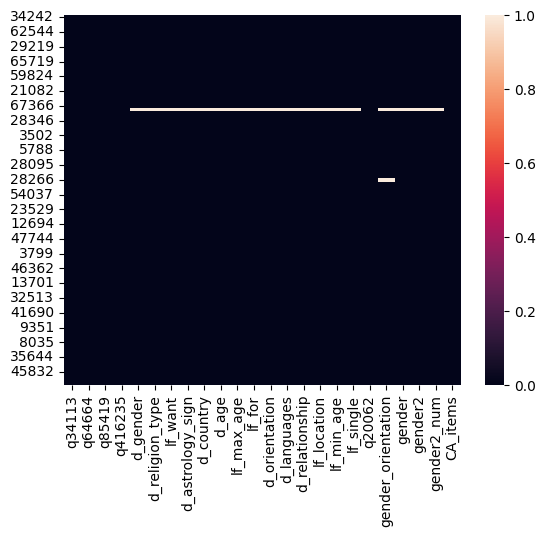

In [26]:
import seaborn 

seaborn.heatmap(subset.isnull())

In [42]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

subset = df.loc[:, df.isnull().mean() < 0.25]
X = subset.filter(regex='^d_')
y = subset.filter(regex='^q').notna().sum(axis=1)

le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == 'object' else col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head(10))

Mean Squared Error: 35.56063461303711
             feature  importance
6           d_drinks    0.602875
4   d_astrology_sign    0.101427
1    d_religion_type    0.050341
0           d_gender    0.041122
9         d_bodytype    0.032795
2            d_drugs    0.030432
8        d_ethnicity    0.028533
11       d_languages    0.025389
5          d_country    0.023825
10     d_orientation    0.019639


In [49]:
35.56063461303711 **.5

5.963273816708161

<Axes: >

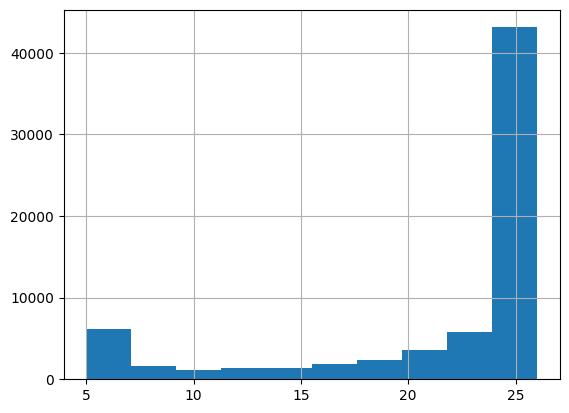

In [48]:
print(subset.filter(regex='^q\d').shape, df.filter(regex='^q\d').shape)

(68371, 26) (68371, 2541)


In [66]:
df['missing'] = missing

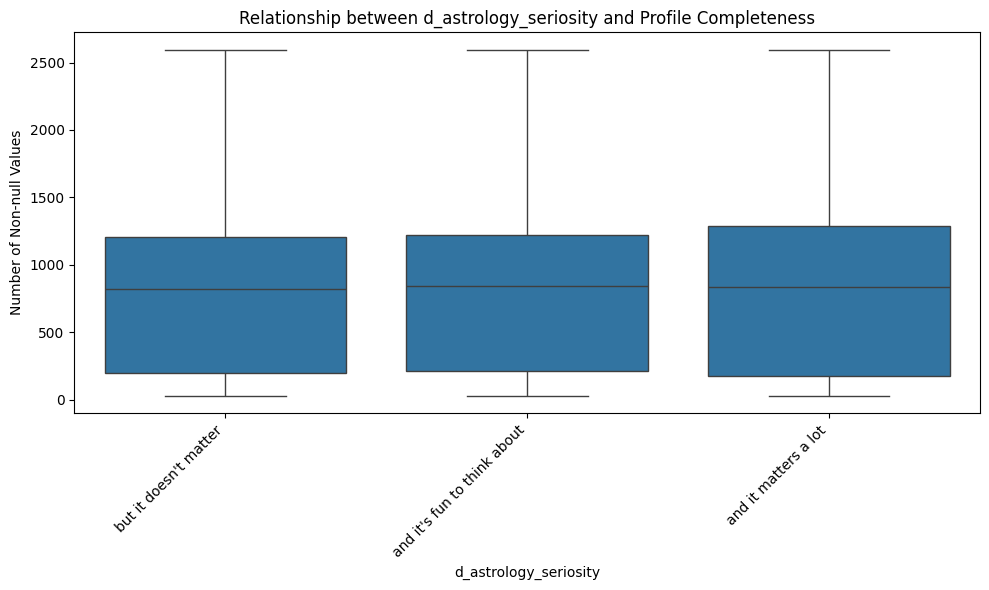

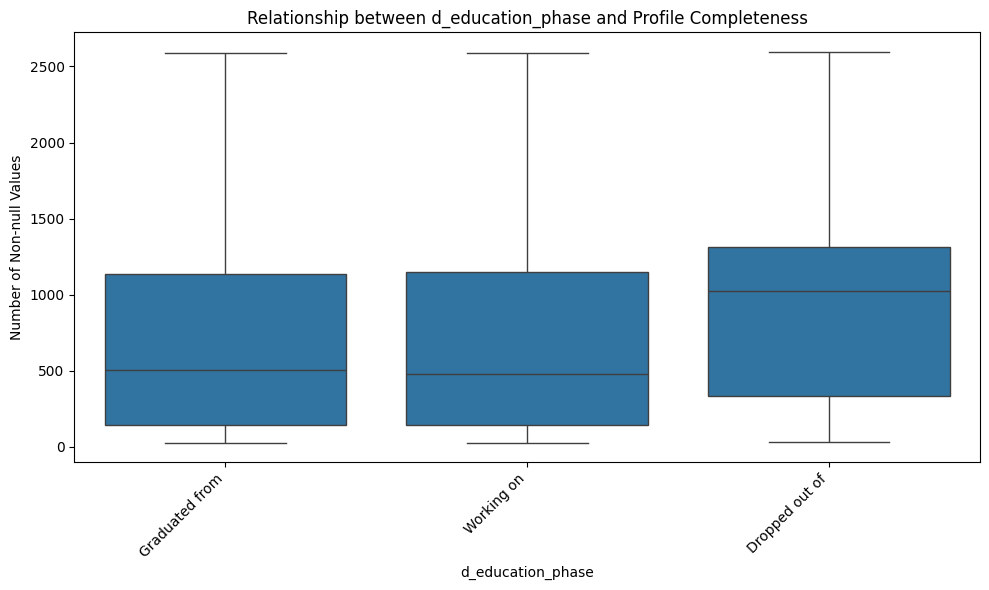

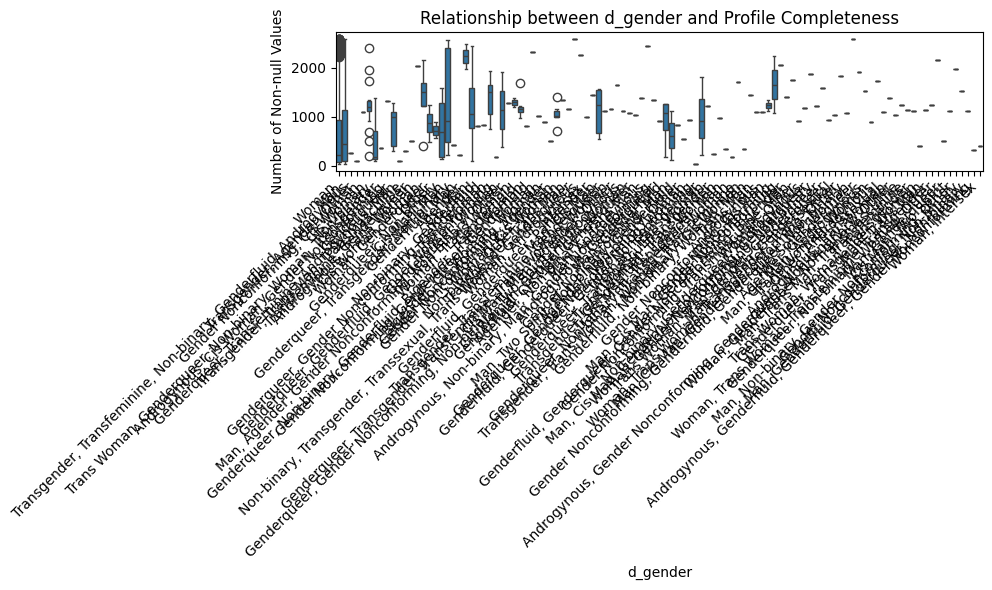

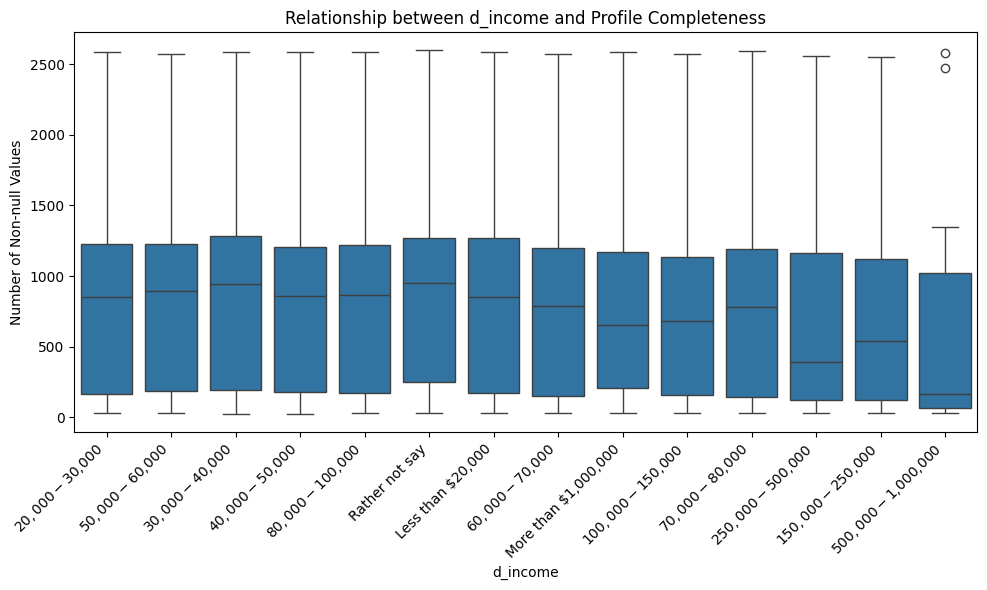

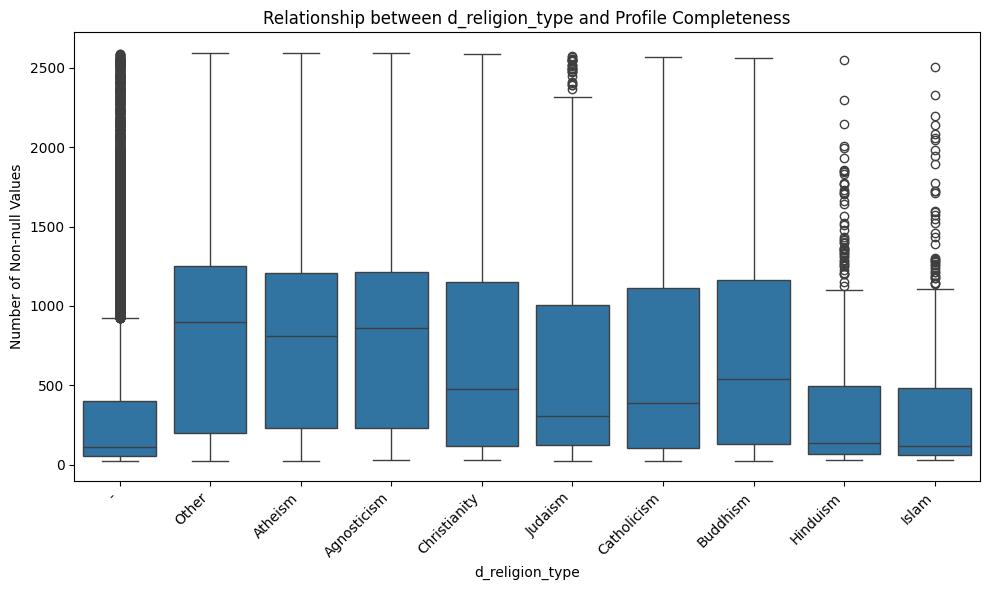

Correlation with profile completeness:
d_age    0.273801
dtype: float64


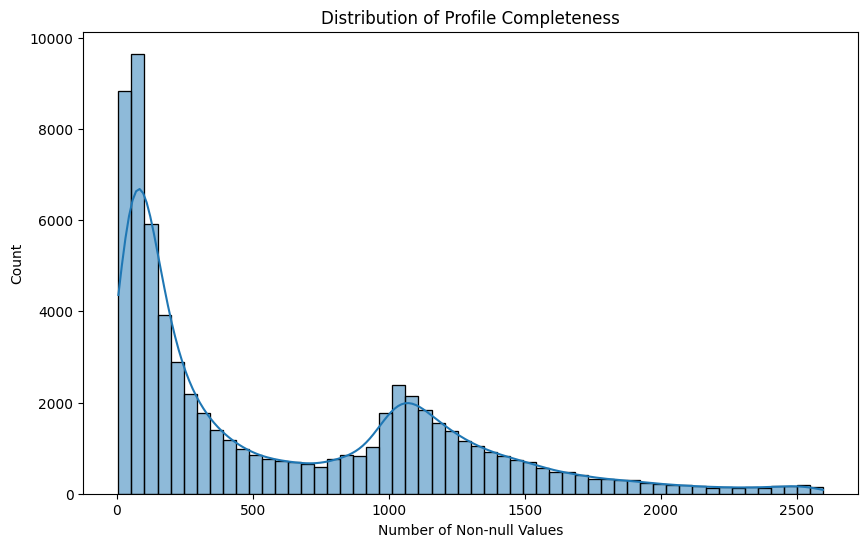

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of non-null values for each person
completeness = df.notna().sum(axis=1)

# Select demographic columns (assuming they start with 'd_')
demographic_cols = [col for col in df.columns if col.startswith('d_')]

# Create a function to plot the relationship between a column and completeness
def plot_completeness_relationship(column):
    plt.figure(figsize=(10, 6))
    if df[column].dtype == 'object':
        sns.boxplot(x=column, y=completeness, data=df)
        plt.xticks(rotation=45, ha='right')
    else:
        sns.scatterplot(x=column, y=completeness, data=df)
    plt.title(f'Relationship between {column} and Profile Completeness')
    plt.ylabel('Number of Non-null Values')
    plt.tight_layout()
    plt.show()

# Plot for a few demographic columns
for col in demographic_cols[:5]:  # Adjust the number as needed
    plot_completeness_relationship(col)

# Look at the correlation for numeric columns
numeric_cols = df[demographic_cols].select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corrwith(completeness)
print("Correlation with profile completeness:")
print(correlation.sort_values(ascending=False))

# Distribution of profile completeness
plt.figure(figsize=(10, 6))
sns.histplot(completeness, kde=True)
plt.title('Distribution of Profile Completeness')
plt.xlabel('Number of Non-null Values')
plt.show()

In [74]:
missing.sort_values()

q64664      0.000000
q416235     0.000000
CA_items    0.000000
q34113      0.000000
q85419      0.000000
              ...   
q125283     0.998157
q155299     0.998245
q72000      0.998259
q92899      0.998523
missing     1.000000
Length: 2626, dtype: float64

In [76]:
missing.sort_value().index

AttributeError: 'Series' object has no attribute 'sort_value'

<Axes: >

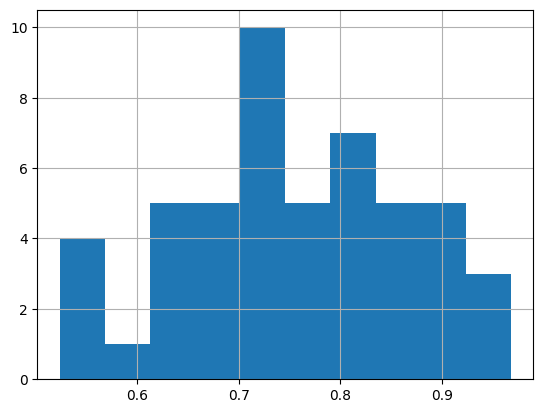

In [82]:
df.filter(regex='^p_').isna().mean().hist()

In [83]:
df.filter(regex='^p_').isna().mean().loc[lambda x: x < .7]

p_lit         0.629902
p_roman       0.670781
p_polit       0.628863
p_pure        0.563909
p_kinky       0.613038
p_sexdrive    0.543418
p_artsy       0.668851
p_scien       0.641354
p_oldfash     0.566483
p_comp        0.699405
p_lovedri     0.619210
p_sprit       0.523877
p_geeky       0.668105
p_adven       0.611882
dtype: float64